In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,mlxtend

Sebastian Raschka 
last updated: 2016-06-11 

CPython 3.5.1
IPython 4.2.0

numpy 1.11.0
mlxtend 0.4.2.dev0


---

**This Jupyter notebook contains the code to create the data visualizations for the article "Model evaluation, model selection, and algorithm selection in machine learning - Part I"
at http://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html.**

---

In [2]:
%matplotlib inline

# Iris Feature by Class Distribution in Random Subsampling

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = iris_data()

X, y = shuffle_arrays_unison([X, y], random_seed=123)
X_train, X_test = X[:100], X[100:150]
y_train, y_test = y[:100], y[100:150]

In [4]:
np.bincount(y)

array([50, 50, 50])

In [5]:
np.bincount(y_train)

array([38, 28, 34])

In [6]:
np.bincount(y_test)

array([12, 22, 16])

In [7]:
df = pd.DataFrame(X)
df['class'] = y

df_train = pd.DataFrame(X_train)
df_train['class'] = y_train

df_test = pd.DataFrame(X_test)
df_test['class'] = y_test

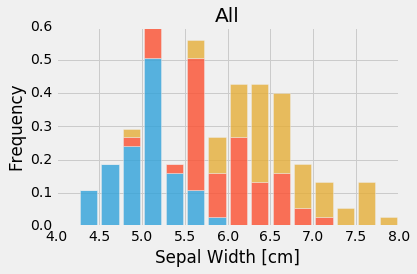

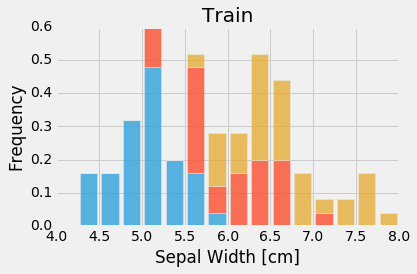

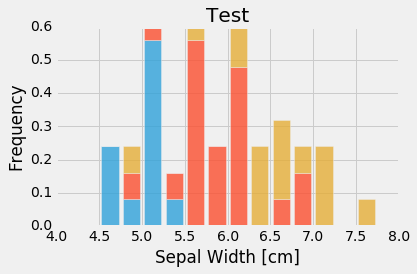

In [9]:
def stackhist(x, y, **kws):
    grouped = pd.groupby(x, y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, histtype="barstacked", 
             label=labels, alpha=0.8, normed=True,
             bins=np.arange(4.0, 8.1, 0.25))
    plt.ylim([0, 0.6])
    plt.xlim([4, 8])
    plt.xlabel('Sepal Width [cm]')
    plt.ylabel('Frequency')

with plt.style.context('fivethirtyeight'):    
    
    stackhist(df[0], df['class'])
    #plt.legend(['Setosa', 'Virginica', 'Versicolor'], fontsize=12)
    plt.title('All')
    plt.tight_layout()
    plt.savefig('./all.svg')
    plt.show()    

    stackhist(df_train[0], df_train['class'])
    plt.title('Train')
    plt.tight_layout()
    #plt.savefig('./train.svg')
    plt.show()    

    stackhist(df_test[0], df_test['class'])
    plt.title('Test')
    plt.tight_layout()
    #plt.savefig('./test.svg')
    plt.show() 
    
    """
    fig = plt.figure()
    figlegend = plt.figure(figsize=(3,4))
    ax = fig.add_subplot(111)
    lines = ax.plot(range(10), np.random.randn(10), range(10), np.random.randn(10), np.random.randn(10), range(10),)
    figlegend.legend(lines, ['Setosa', 'Virginica', 'Versicolor'], 'center')
    fig.show()
    figlegend.show()
    figlegend.savefig('legend.svg')
    """